In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import functions.add_path

import functions.plotnine_theme
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import *

import functions.et_condition_df as condition_df
import functions.et_make_df as  make_df
import be_load

/home/student/b/behinger/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


reached exception:pyaudio
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:glfw.GLFW_KEY_SPACE
reached exception:glfw.GLFW_KEY_F
reached exception:glfw.glfwSetKeyCallback
reached exception:fingertip_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
reached exception:optimization_calibration
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:glfw.GLFW_KEY_SPACE
reached exception:glfw.GLFW_KEY_F
reached exception:glfw.glfwSetKeyCallback
reached exception:fingertip_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
reached exception:optimization_calibration


In [3]:
import os
print(os.getcwd())
if os.getcwd()[-4:] != 'code':
    try:
        os.chdir('./code')
    except:
        os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code')


/net/store/nbp/users/behinger/projects/etcomp/lib/pupil/pupil_src/shared_modules/calibration_routines/optimization_calibration


In [4]:
import functions.et_import as et_import
import scipy
import scipy.stats
import numpy as np

In [5]:
# Draw Raw Lag
pl = et_import.raw_pl_data(subject="VP3")
t_cam = np.asarray([p['recent_frame_timestamp'] for p in pl['notifications'] if p['subject']=='trigger'])# camera time
t_msg = np.asarray([p['timestamp'] for p in pl['notifications'] if p['subject']=='trigger']) # msg time

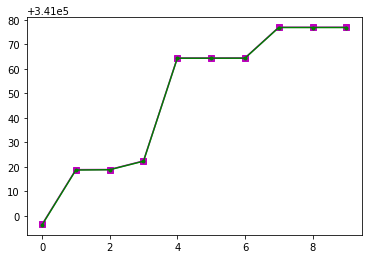

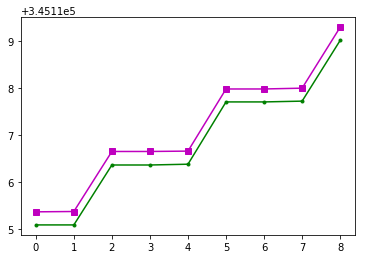

In [26]:
plt.figure()
plt.plot(t_msg[0:10],'ms-')
plt.plot(t_cam[0:10],'g.-')

plt.figure()
plt.plot(t_msg[-10:-1],'ms-')
plt.plot(t_cam[-10:-1],'g.-')


In [5]:
def pl_fix_timelag(pl):
    t_cam = np.asarray([p['recent_frame_timestamp'] for p in pl['notifications'] if p['subject']=='trigger'])# camera time
    t_msg = np.asarray([p['timestamp'] for p in pl['notifications'] if p['subject']=='trigger']) # msg time
    #slope, intercept, r_value, p_value, std_err  = scipy.stats.linregress(t_msg,t_cam) # predict camera time based on msg time
    slope,intercept,low,high = scipy.stats.theilslopes(t_cam,t_msg)
    t_fixed_msg = slope*t_msg + intercept
    print("lag found (at t=0) of :%.16fms, slope of %.16f"%(intercept,slope))
    return(t_fixed_msg)

subject 0 not successful
lag found (at t=0) of :-0.0505400938968705ms, slope of 1.0000007088626330
lag found (at t=0) of :-0.0425883695024822ms, slope of 1.0000001941394778
lag found (at t=0) of :15.0431047803722322ms, slope of 0.9999555986612232
lag found (at t=0) of :14.9163540387526155ms, slope of 0.9999567103452748
subject 5 not successful
subject 6 not successful
lag found (at t=0) of :-0.0325290617874998ms, slope of 0.9999994569037450
subject 8 not successful
subject 9 not successful
subject 10 not successful
lag found (at t=0) of :-0.0296565959506552ms, slope of 0.9999991572830416
lag found (at t=0) of :-0.0056710223434493ms, slope of 0.9999987169300159
subject 13 not successful
lag found (at t=0) of :-0.0287025438483397ms, slope of 0.9999992190096101
lag found (at t=0) of :-0.0424002625154571ms, slope of 0.9999997716636086
subject 16 not successful
subject 17 not successful
subject 18 not successful
lag found (at t=0) of :-0.0418542583238377ms, slope of 1.0000000154156026
lag f

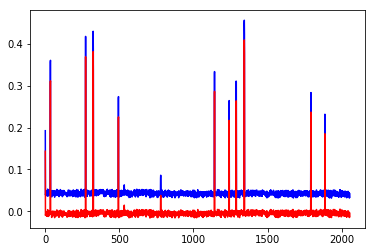

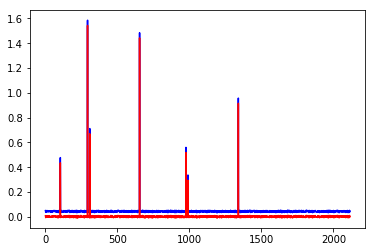

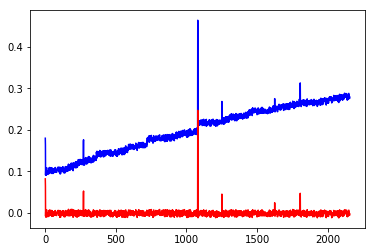

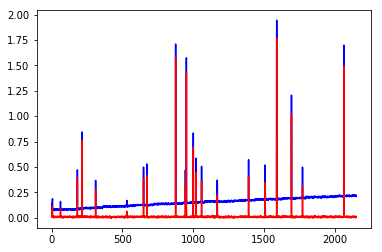

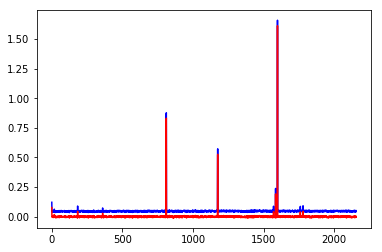

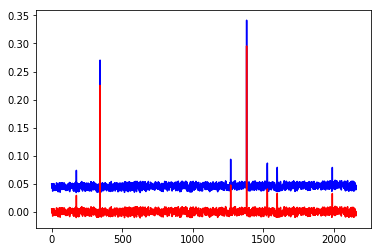

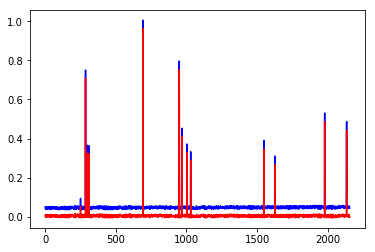

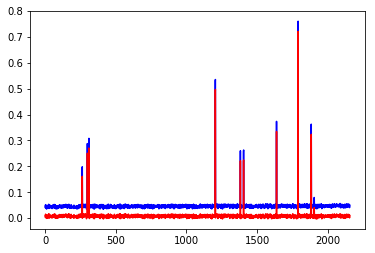

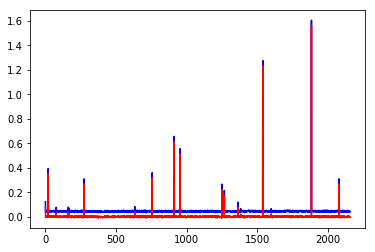

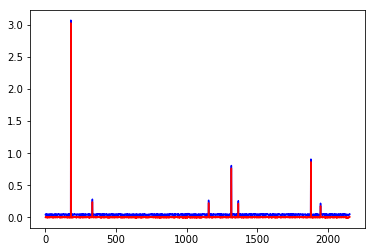

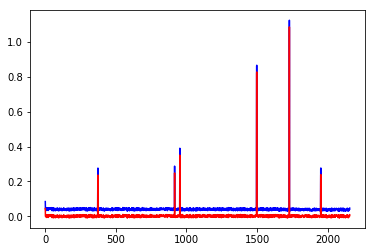

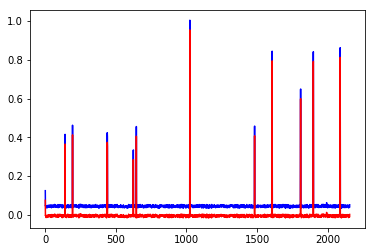

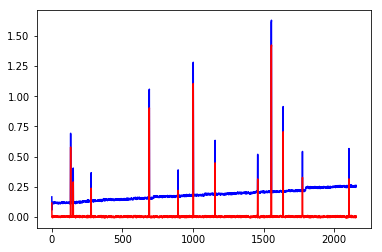

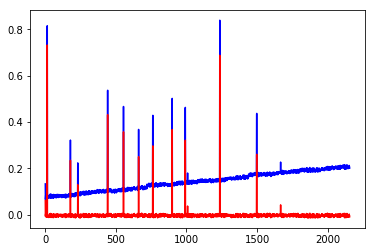

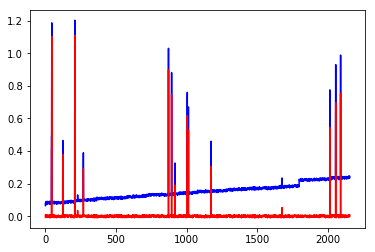

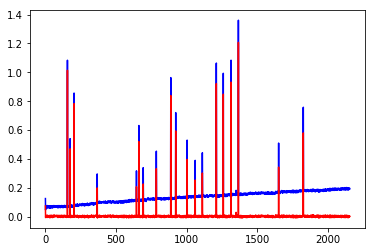

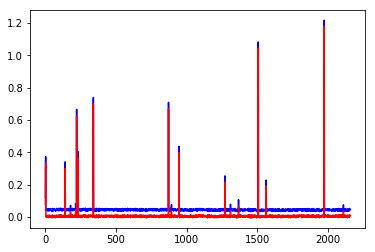

In [7]:
# Load all subjects and plot them (5 / 15 show drift!)
for ix,subject in enumerate(range(30)):
    try:
        pl = et_import.raw_pl_data(subject="VP%i"%(subject))
        t_msg = np.asarray([p['timestamp'] for p in pl['notifications'] if p['subject']=='trigger']) # msg time
        t_cam = np.asarray([p['recent_frame_timestamp'] for p in pl['notifications'] if p['subject']=='trigger'])
        newtime = pl_fix_timelag(pl)
        plt.figure(ix)
        plt.plot(t_msg-t_cam,'b')
        plt.plot(newtime-t_cam,'r')
    except:
        print('subject %i not successful'%(subject))
    